In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 2.Load Dataset
data = pd.read_csv("viettri_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,44,17,29,2,9,4
1,3/2/2019,65,37,27,4,12,4
2,3/3/2019,81,38,2,1,1,2
3,3/4/2019,51,24,21,4,8,1
4,3/5/2019,43,7,23,1,12,4
...,...,...,...,...,...,...,...
1915,5/28/2024,38,24,35,1,15,5
1916,5/29/2024,38,17,41,7,15,10
1917,5/30/2024,28,8,11,1,15,1
1918,5/31/2024,12,12,16,1,16,7


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,42.395313,22.470833,17.391667,7.528125,9.497917,3.961979
std,31.665288,16.124166,12.907283,4.971229,6.526731,2.516048
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,10.000000,8.750000,3.000000,4.000000,2.000000
50%,35.000000,20.000000,15.000000,7.000000,9.000000,4.000000
75%,59.000000,32.000000,24.000000,11.000000,14.000000,6.000000
max,178.000000,94.000000,114.000000,35.000000,27.000000,22.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,44
1,65
2,81
3,51
4,43
...,...
1915,38
1916,38
1917,28
1918,12


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)


<Axes: >

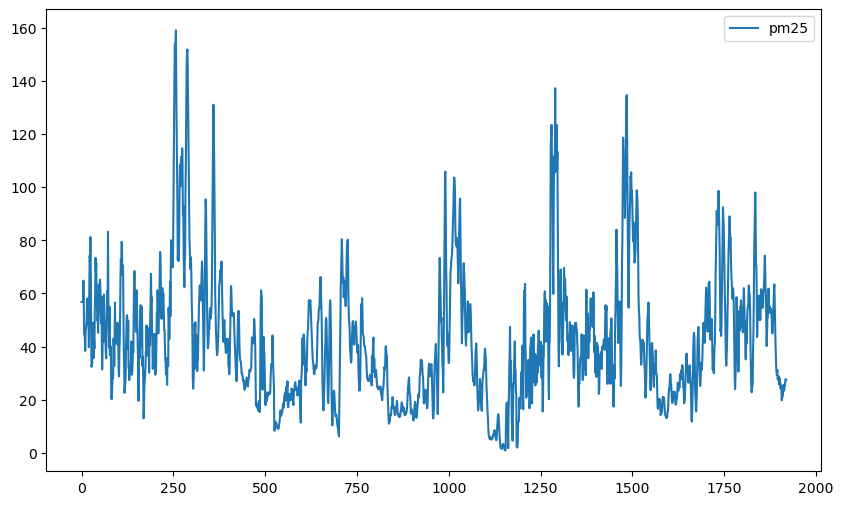

In [6]:
data.plot(figsize=(10,6))

In [7]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1536
Test data size: 384


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [9]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['pm25'])
y_pred = model.predict(x_test)


In [10]:
y_pred = pd.DataFrame(y_pred, columns=['pm25'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [11]:
# #5 Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+91, step=1)

# Tạo mảng 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán
y_next_90_days = model.predict(x_next_90_days)


# In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[38.0954687  38.09155569 38.08764269 38.08372968 38.07981668 38.07590367
 38.07199066 38.06807766 38.06416465 38.06025164 38.05633864 38.05242563
 38.04851263 38.04459962 38.04068661 38.03677361 38.0328606  38.02894759
 38.02503459 38.02112158 38.01720858 38.01329557 38.00938256 38.00546956
 38.00155655 37.99764355 37.99373054 37.98981753 37.98590453 37.98199152
 37.97807851 37.97416551 37.9702525  37.9663395  37.96242649 37.95851348
 37.95460048 37.95068747 37.94677446 37.94286146 37.93894845 37.93503545
 37.93112244 37.92720943 37.92329643 37.91938342 37.91547042 37.91155741
 37.9076444  37.9037314  37.89981839 37.89590538 37.89199238 37.88807937
 37.88416637 37.88025336 37.87634035 37.87242735 37.86851434 37.86460133
 37.86068833 37.85677532 37.85286232 37.84894931 37.8450363  37.8411233
 37.83721029 37.83329729 37.82938428 37.82547127 37.82155827 37.81764526
 37.81373225 37.80981925 37.80590624 37.80199324 37.79808023 37.79416722
 37.7

In [12]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 7. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 8. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)



Testing RMSE: 19.528214061504496

Testing MAPE: 45.73119414648457

MAE: 15.962508832788991


In [13]:
test_data.index

RangeIndex(start=1536, stop=1920, step=1)

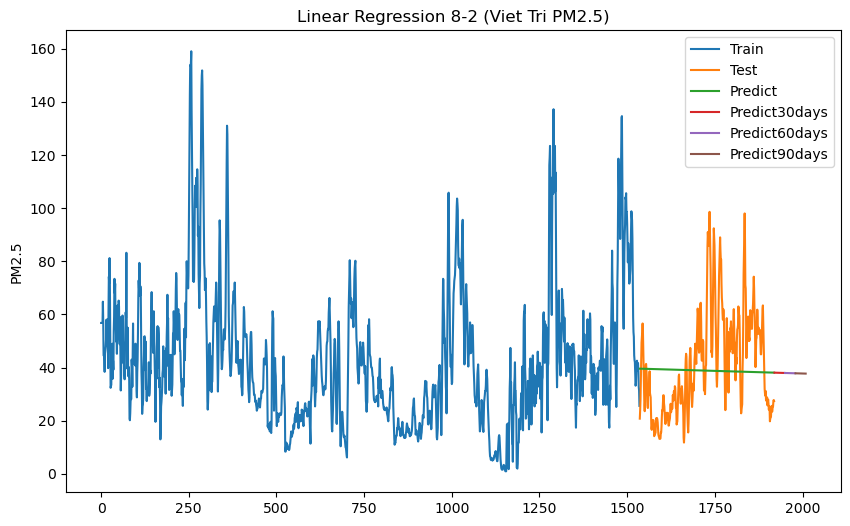

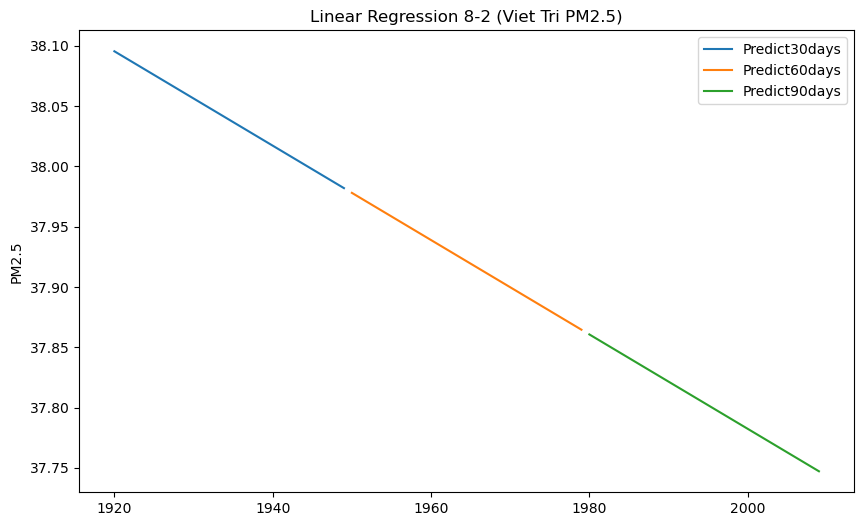

In [14]:
# 9.Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)


last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_90_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_90_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_90_days[60:90])

plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title('Linear Regression 8-2 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()


#DỰ đians 90 ngày
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_90_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_90_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_90_days[60:90])
plt.legend(['Predict30days', 'Predict60days', 'Predict90days'])
plt.title('Linear Regression 8-2 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()

